# EMHIRES Capacity Factor Analysis Script Documentation

**Created**: Wed Jan 24 2024

**Purpose**:
This JupyterLab notebook is supplementary material for the research paper "Effects of emissions caps on the costs and feasibility of low-carbon hydrogen in the European ammonia industry". It is designed to perform a detailed analysis of the capacity factors for solar and wind energy production in Europe. It uses the EMHIRES dataset, which includes:

- **EMHIRES Part I**: Wind power generation data [(Link to dataset)](https://op.europa.eu/en/publication-detail/-/publication/85b2dc7f-aa61-11e6-aab7-01aa75ed71a1/language-en)
- **EMHIRES Part II**: Solar power generation data [(Link to dataset)](https://op.europa.eu/en/publication-detail/-/publication/a6c0cf55-45aa-11e7-aea8-01aa75ed71a1/language-en)

The datasets provide hourly renewable energy generation data at the NUTS-2 level across Europe.

## Objectives

The script's main goals are to:

- Extract and analyze capacity factor data for solar and wind energy resources.
- Calculate average capacity factors using the provided hourly data.
- Identify trends and patterns in solar and wind energy generation across various European regions.
- Select representative regions for further sensitivity analysis.

## Prerequisites

Before executing the script, users must:

- Download the EMHIRES datasets from the provided links.
- Ensure the datasets are placed in a directory accessible by the script.
- Install all necessary Python libraries and dependencies.

For any further inquiries or a detailed discussion, please reach out to the corresponding author.

### Corresponding Author
**S. Mingolla**
**Email**: smingolla@connect.ust.hk

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Solar data

In [4]:
# import EMHIRES dataframes solar data
df_solar = pd.read_csv(r'EMHIRES_PV_NUTS2.csv')
df_solar = df_solar.fillna(0)
df_solar = df_solar.drop(columns=['time_step'])
df_solar['Date'] = pd.date_range(start='1/1/1986', periods=len(df_solar), freq='H')

# Count the number of null values in the dataframe
num_null = df_solar.isnull().sum().sum()
#print(f"There are {num_null} null values in the dataframe.")

# extract the year from the 'Date' column and create a new column called 'Year'
df_solar['Year'] = df_solar['Date'].dt.year
# calculate the mean value for each year/region using the groupby function
mean_values = df_solar.groupby(['Year']).mean()

# Filter the mean_values DataFrame to drop the columns with only zeros
zero_columns = mean_values.columns[mean_values.eq(0).all()]
mean_values_filtered = mean_values.drop(zero_columns, axis=1)

# Calculate the mean of each column
column_means = mean_values_filtered.mean(axis=0)

# Sort the columns based on the mean values
mean_values_sorted = mean_values_filtered[column_means.sort_values().index]

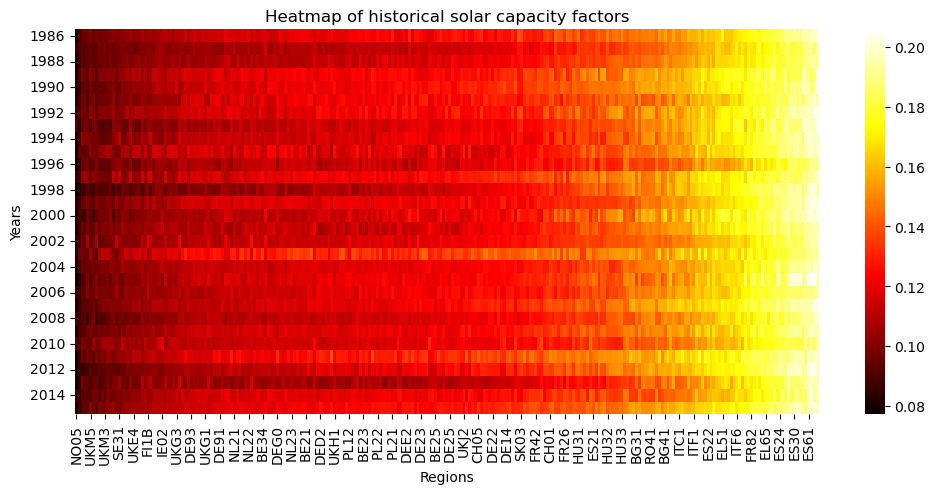

In [5]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Create the heatmap with column and row names as labels
ax = sns.heatmap(mean_values_sorted, cmap='hot')

# Set the title
plt.title("Heatmap of historical solar capacity factors")

# Set the axis labels
plt.xlabel("Regions")
plt.ylabel("Years")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the heatmap
plt.show()

In [6]:
# Now, let's create a DF with rows as combination of NUTS-2 region and year, melting the dataframe
# Reset index to bring 'year' into columns
df_reset = mean_values_filtered.reset_index()

# Melt the DataFrame to have 'year', 'region', and 'value' columns
df_melted = df_reset.melt(id_vars='Year', var_name='region', value_name='value')

# Combine 'year' and 'region' into a new column 'year_region'
df_melted['year_region'] = df_melted['region'] + '-' + df_melted['Year'].astype(str)

---

## Wind data

In [8]:
# import EMHIRES dataframes solar data
df_wind = pd.read_csv(r'EMHIRES_WIND_NUTS2.csv')
df_wind = df_wind.fillna(0)
df_wind = df_wind.drop(columns=['Time step'])
df_wind['Date'] = pd.date_range(start='1/1/1986', periods=len(df_wind), freq='H')
df_wind.drop_duplicates(subset='Date', inplace=True)

# Count the number of null values in the dataframe
num_null = df_wind.isnull().sum().sum()
#print(f"There are {num_null} null values in the dataframe.")

# extract the year from the 'Date' column and create a new column called 'Year'
df_wind['Year'] = df_wind['Date'].dt.year

# calculate the mean value for each year/region using the groupby function
mean_values = df_wind.groupby(['Year']).mean()

# Filter the mean_values DataFrame to drop the columns with only zeros
zero_columns = mean_values.columns[mean_values.eq(0).all()]
mean_values_filtered = mean_values.drop(zero_columns, axis=1)

# Calculate the mean of each column
column_means = mean_values_filtered.mean(axis=0)

# Sort the columns based on the mean values
mean_values_sorted = mean_values_filtered[column_means.sort_values().index]

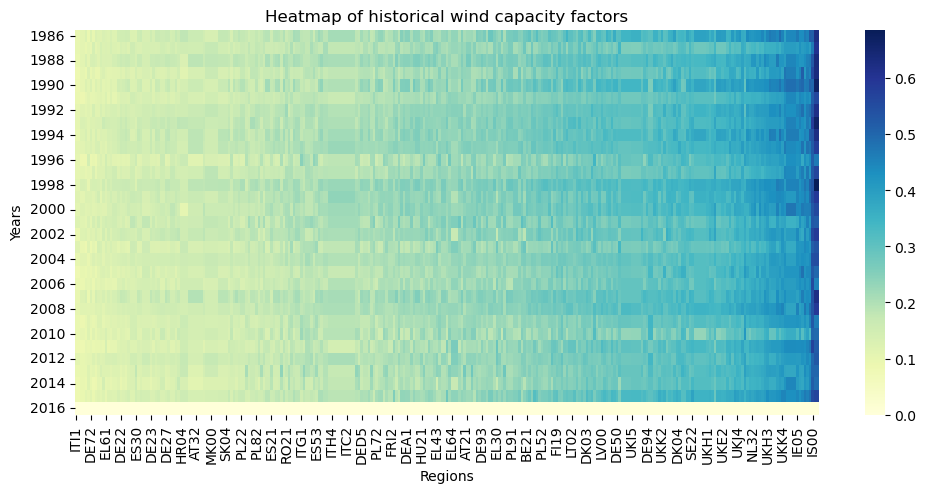

In [9]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Create the heatmap with column and row names as labels
ax = sns.heatmap(mean_values_sorted, cmap='YlGnBu')

# Set the title
plt.title("Heatmap of historical wind capacity factors")

# Set the axis labels
plt.xlabel("Regions")
plt.ylabel("Years")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the heatmap
plt.show()

In [10]:
# Now, let's create a DF with rows as combination of NUTS-2 region and year, melting the dataframe
# Reset index to bring 'year' into columns
df_reset = mean_values_filtered.reset_index()

# Melt the DataFrame to have 'year', 'region', and 'value' columns
df_melted = df_reset.melt(id_vars='Year', var_name='region', value_name='value')

# Combine 'year' and 'region' into a new column 'year_region'
df_melted['year_region'] = df_melted['region'] + '-' + df_melted['Year'].astype(str)

---

In [ ]:
# import libraries
import pandas as pd
import matplotlib as plt
import numpy as np

In [ ]:
df = pd.read_csv(r'regions_years_percentile_EMHIRES.csv')
df

In [ ]:
# Calculate the 10th percentile for perc_PV
pv_percentile = df['CF_PV'].quantile(0.03)

# Calculate the 90th percentile for perc_WT
wt_percentile = df['CF_WT'].quantile(0.995)

# Filter the rows that meet the criteria
Wind_dominated = df[(df['CF_PV'] <= pv_percentile) & (df['CF_WT'] >= wt_percentile)]

In [ ]:
# Calculate the 10th percentile for perc_PV
pv_percentile = df['CF_PV'].quantile(0.98)

# Calculate the 90th percentile for perc_WT
wt_percentile = df['CF_WT'].quantile(0.02)

# Filter the rows that meet the criteria
Solar_dominated = df[(df['CF_PV'] >= pv_percentile) & (df['CF_WT'] <= wt_percentile)]

In [ ]:
# Calculate the 49th and 51st percentiles for CF_PV
pv_percentile_49 = df['CF_PV'].quantile(0.49)
pv_percentile_51 = df['CF_PV'].quantile(0.51)

# Calculate the 49th and 51st percentiles for CF_WT
wt_percentile_49 = df['CF_WT'].quantile(0.49)
wt_percentile_51 = df['CF_WT'].quantile(0.51)

# Filter the rows that meet the criteria
Median_capacity = df[
    (df['CF_PV'] >= pv_percentile_49) & (df['CF_PV'] <= pv_percentile_51) &
    (df['CF_WT'] >= wt_percentile_49) & (df['CF_WT'] <= wt_percentile_51)
]

In [ ]:
# Calculate the 75th percentile for CF_PV and CF_WT
pv_percentile_75 = df['CF_PV'].quantile(0.85)
wt_percentile_75 = df['CF_WT'].quantile(0.85)

# Filter the rows that meet the criteria
High_capacity = df[(df['CF_PV'] >= pv_percentile_75) & (df['CF_WT'] >= wt_percentile_75)]

In [ ]:
# Calculate the 25th percentile for CF_PV and CF_WT
pv_percentile_25 = df['CF_PV'].quantile(0.1)
wt_percentile_25 = df['CF_WT'].quantile(0.1)

# Filter the rows that meet the criteria
Low_capacity = df[(df['CF_PV'] <= pv_percentile_25) & (df['CF_WT'] <= wt_percentile_25)]

In [ ]:
High_capacity = High_capacity.assign(Category='High')
Low_capacity = Low_capacity.assign(Category='Low')
Median_capacity = Median_capacity.assign(Category='Median')
Solar_dominated = Solar_dominated.assign(Category='Solar')
Wind_dominated = Wind_dominated.assign(Category='Wind')

# Combine all dataframes into one
combined_df = pd.concat([High_capacity, Low_capacity, Median_capacity, Solar_dominated, Wind_dominated], ignore_index=True)